In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")

# basic info of the df
print("Shape:", df.shape)
print(df.info())
print(df.describe().T.head())

#check for Nan values
print("Missing values:\n", df.isna().sum().sort_values(ascending=False).head())

Shape: (253680, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non

C:\Users\liyic_fgmu\AppData\Local\Temp\ipykernel_2984\298818204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDiseaseorAttack', data=df, palette='Set2')


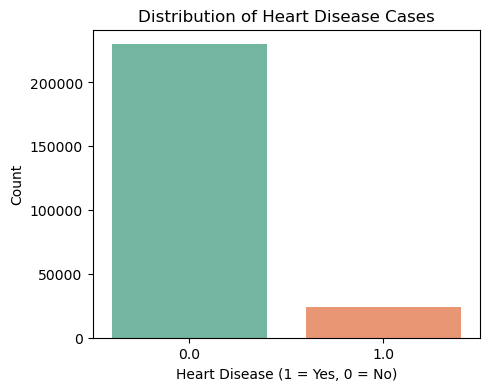

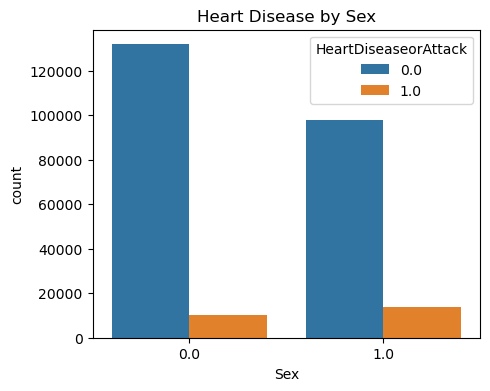

C:\Users\liyic_fgmu\AppData\Local\Temp\ipykernel_2984\298818204.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Age", y="HeartDiseaseorAttack", palette="coolwarm",errorbar=None)


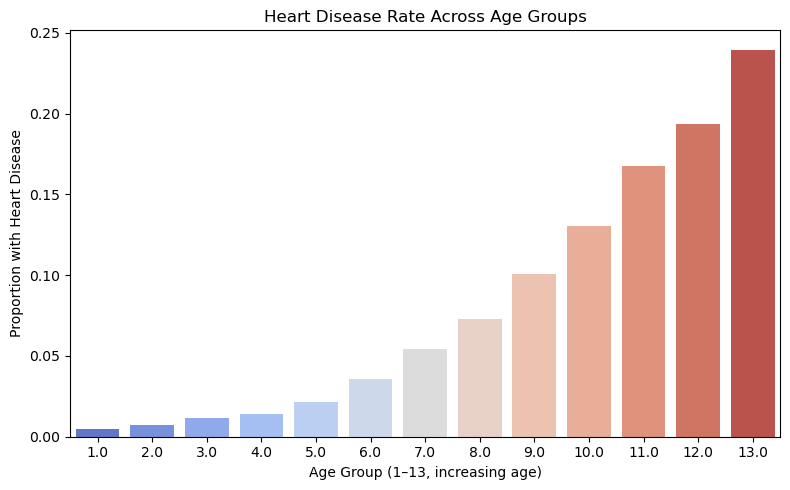

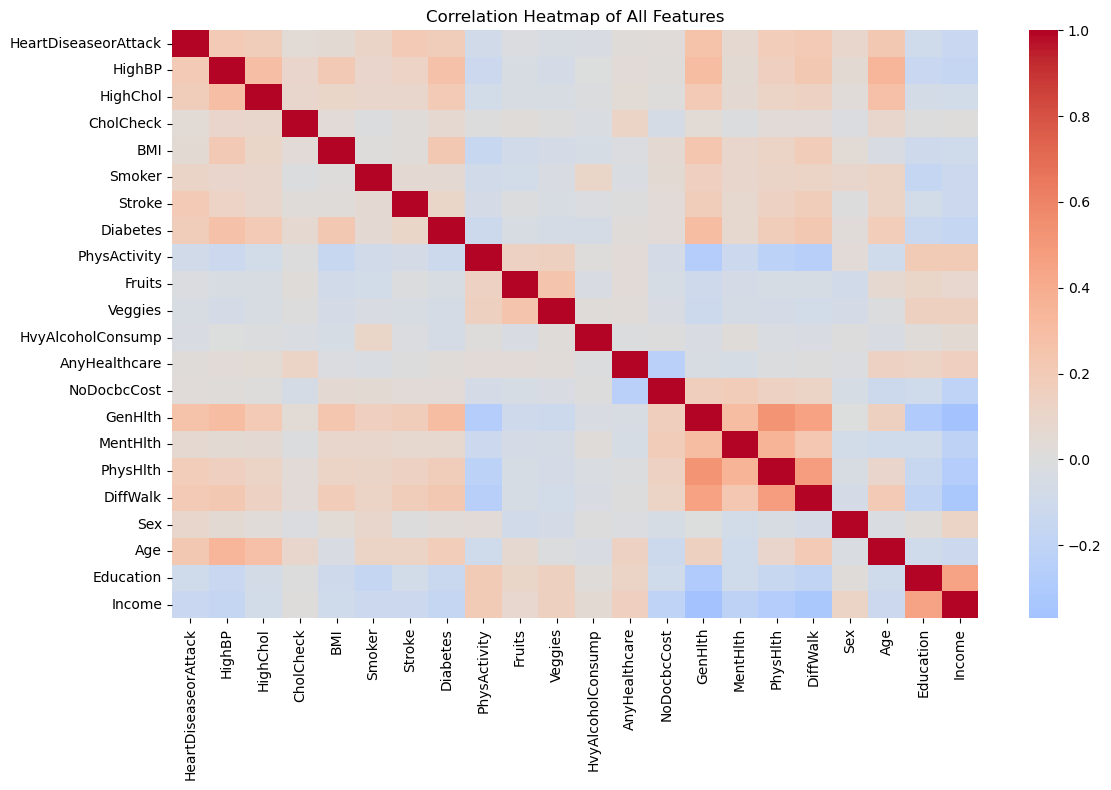

C:\Users\liyic_fgmu\AppData\Local\Temp\ipykernel_2984\298818204.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="PhysActivity", y="HeartDiseaseorAttack", palette="crest")


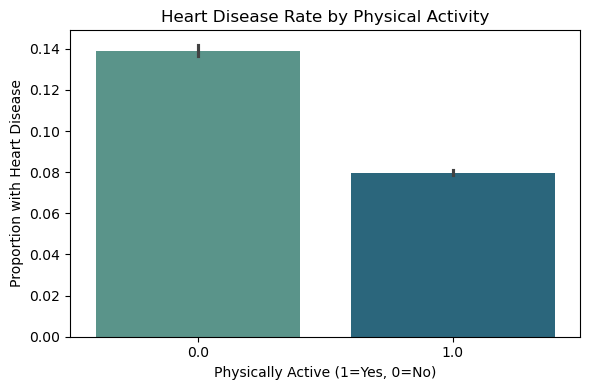

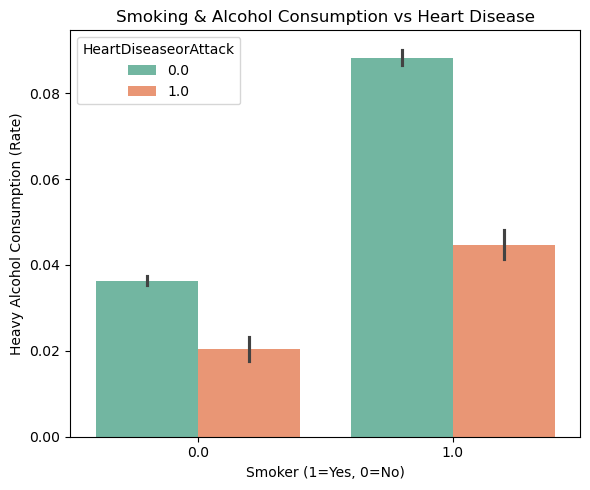

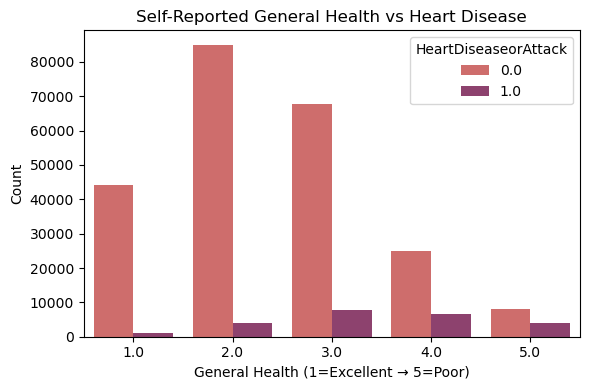

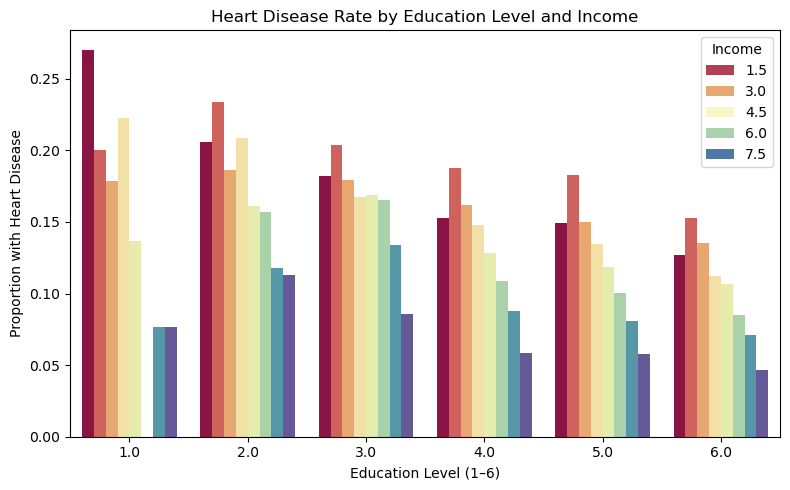

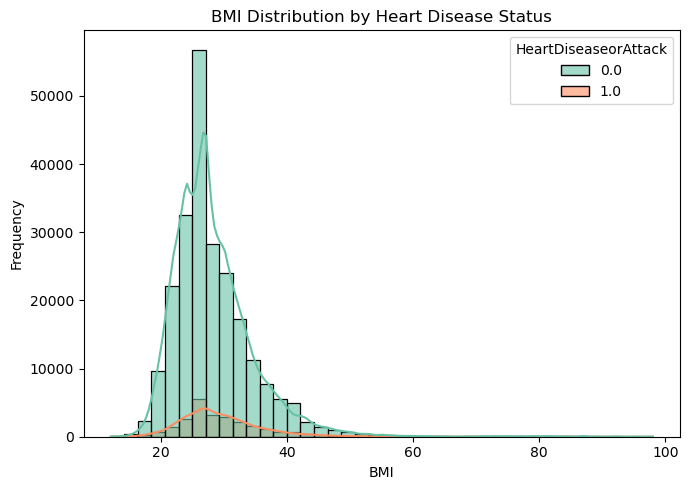

In [3]:
# EDA
plt.figure(figsize=(5,4))
sns.countplot(x='HeartDiseaseorAttack', data=df, palette='Set2')
plt.title('Distribution of Heart Disease Cases')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5,4))
sns.countplot(x='Sex', hue='HeartDiseaseorAttack', data=df)
plt.title('Heart Disease by Sex')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Age", y="HeartDiseaseorAttack", palette="coolwarm",errorbar=None)
plt.title("Heart Disease Rate Across Age Groups")
plt.xlabel("Age Group (1–13, increasing age)")
plt.ylabel("Proportion with Heart Disease")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Heatmap of All Features")
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,4))
sns.barplot(data=df, x="PhysActivity", y="HeartDiseaseorAttack", palette="crest")
plt.title("Heart Disease Rate by Physical Activity")
plt.xlabel("Physically Active (1=Yes, 0=No)")
plt.ylabel("Proportion with Heart Disease")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,5))
sns.barplot(data=df, x="Smoker", y="HvyAlcoholConsump", hue="HeartDiseaseorAttack", palette="Set2")
plt.title("Smoking & Alcohol Consumption vs Heart Disease")
plt.xlabel("Smoker (1=Yes, 0=No)")
plt.ylabel("Heavy Alcohol Consumption (Rate)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="GenHlth", hue="HeartDiseaseorAttack", palette="flare")
plt.title("Self-Reported General Health vs Heart Disease")
plt.xlabel("General Health (1=Excellent → 5=Poor)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Education", y="HeartDiseaseorAttack", hue="Income", palette="Spectral",errorbar=None)
plt.title("Heart Disease Rate by Education Level and Income")
plt.xlabel("Education Level (1–6)")
plt.ylabel("Proportion with Heart Disease")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
sns.histplot(data=df, x="BMI", hue="HeartDiseaseorAttack", kde=True, bins=40, palette="Set2", alpha=0.6)
plt.title("BMI Distribution by Heart Disease Status")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [4]:
# split data using stratified split(70 15 15)
from sklearn.model_selection import train_test_split

df_train, df_temp = train_test_split(
    df,
    test_size=0.30,
    stratify=df["HeartDiseaseorAttack"],
    random_state=42
)

df_val, df_test = train_test_split(
    df_temp,
    test_size=0.5,
    stratify=df_temp["HeartDiseaseorAttack"],
    random_state=42
)

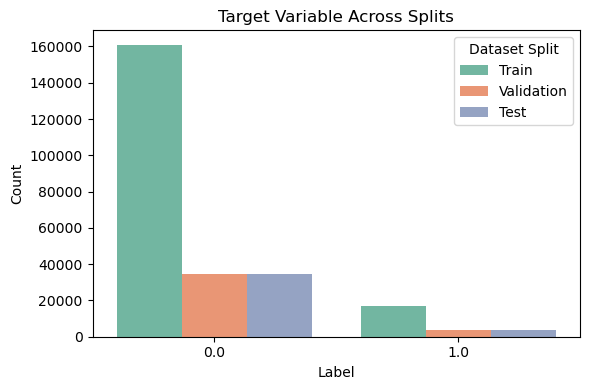

In [5]:
df_train["split"] = "Train"
df_val["split"] = "Validation"
df_test["split"] = "Test"

combined = pd.concat([df_train, df_val, df_test])

plt.figure(figsize=(6, 4))
sns.countplot(data=combined, x="HeartDiseaseorAttack", hue="split", palette="Set2")
plt.title("Target Variable Across Splits")
plt.xlabel("Label")
plt.ylabel("Count")
plt.legend(title="Dataset Split")
plt.tight_layout()
plt.show()


df_train = df_train.drop(columns=["split"])
df_val = df_val.drop(columns=["split"])
df_test = df_test.drop(columns=["split"])

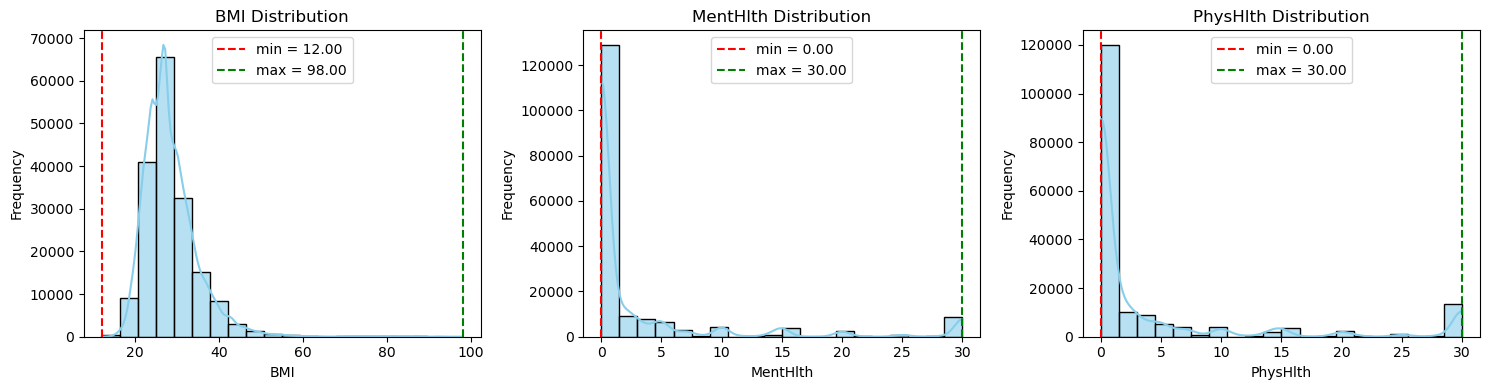

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


cols = ["BMI", "MentHlth", "PhysHlth"]


fig, axes = plt.subplots(1, len(cols), figsize=(5 * len(cols), 4))

for i, col in enumerate(cols):
    ax = axes[i] if len(cols) > 1 else axes

    # Plot histogram with KDE
    sns.histplot(df_train[col], bins=20, kde=True, color="skyblue", alpha=0.6, ax=ax)

    # Add vertical lines for min and max
    col_min = df_train[col].min()
    col_max = df_train[col].max()
    ax.axvline(col_min, color='red', linestyle='--', linewidth=1.5, label=f"min = {col_min:.2f}")
    ax.axvline(col_max, color='green', linestyle='--', linewidth=1.5, label=f"max = {col_max:.2f}")

    # Add labels and title
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.legend()

plt.tight_layout()
plt.show()

In [7]:
# check for boundary proportion
lower_bound = 15
upper_bound = 40

below_normal = (df_train['BMI'] < lower_bound).sum()
above_normal = (df_train['BMI'] >= upper_bound).sum()
total = len(df_train)


below_pct = below_normal / total * 100
above_pct = above_normal / total * 100

print(f"Total samples: {total}")
print(f"Below normal (<{lower_bound}): {below_normal} ({below_pct:.2f}%)")
print(f"Above normal (≥{upper_bound}): {above_normal} ({above_pct:.2f}%)")
print(f"Within normal range: {total - below_normal - above_normal} ({100 - below_pct - above_pct:.2f}%)")


Total samples: 177576
Below normal (<15): 40 (0.02%)
Above normal (≥40): 9600 (5.41%)
Within normal range: 167936 (94.57%)


In [13]:
# perform preprocessing for the needed features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

MinMax_scale = ["MentHlth", "PhysHlth", "BMI"]

scaler = MinMaxScaler()

# fit only on training data to avoid data leakage
scaler.fit(df_train[MinMax_scale])

# copy original splits
df_train_scaled = df_train.copy()
df_val_scaled   = df_val.copy()
df_test_scaled  = df_test.copy()

# transform each split
df_train_scaled[MinMax_scale] = scaler.transform(df_train[MinMax_scale])
df_val_scaled[MinMax_scale]   = scaler.transform(df_val[MinMax_scale])
df_test_scaled[MinMax_scale]  = scaler.transform(df_test[MinMax_scale])
